# Ridge and Lasso Regression - Lab

## Introduction

In this lab, you'll practice your knowledge of ridge and lasso regression!

## Objectives

In this lab you will: 

- Use lasso and ridge regression with scikit-learn 
- Compare and contrast lasso, ridge and non-regularized regression 

## Housing Prices Data

We'll use this version of the Ames Housing dataset: 

In [1]:
# Run this cell without changes
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('housing_prices.csv', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

More information about the features is available in the `data_description.txt` file in this repository.

## Data Preparation

The code below:

* Separates the data into `X` (predictor) and `y` (target) variables
* Splits the data into 75-25 training-test sets, with a `random_state` of 10
* Separates each of the `X` values into continuous vs. categorical features
* Fills in missing values (using different strategies for continuous vs. categorical features)
* Scales continuous features to a range of 0 to 1
* Dummy encodes categorical features
* Combines the preprocessed continuous and categorical features back together

In [2]:
# Run this cell without changes
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create X and y
y = df['SalePrice']
X = df.drop(columns=['SalePrice'])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

# Separate X data into continuous vs. categorical
X_train_cont = X_train.select_dtypes(include='number')
X_test_cont = X_test.select_dtypes(include='number')
X_train_cat = X_train.select_dtypes(exclude='number')
X_test_cat = X_test.select_dtypes(exclude='number')

# Impute missing values using SimpleImputer, median for continuous and
# filling in 'missing' for categorical
impute_cont = SimpleImputer(strategy='median')
X_train_cont = impute_cont.fit_transform(X_train_cont)
X_test_cont = impute_cont.transform(X_test_cont)
impute_cat = SimpleImputer(strategy='constant', fill_value='missing')
X_train_cat = impute_cat.fit_transform(X_train_cat)
X_test_cat = impute_cat.transform(X_test_cat)

# Scale continuous values using MinMaxScaler
scaler = MinMaxScaler()
X_train_cont = scaler.fit_transform(X_train_cont)
X_test_cont = scaler.transform(X_test_cont)

# Dummy encode categorical values using OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')
X_train_cat = ohe.fit_transform(X_train_cat)
X_test_cat = ohe.transform(X_test_cat)

# Combine everything back together
X_train_preprocessed = np.asarray(np.concatenate([X_train_cont, X_train_cat.todense()], axis=1))
X_test_preprocessed = np.asarray(np.concatenate([X_test_cont, X_test_cat.todense()], axis=1))

## Linear Regression Model

Let's use this data to build a first naive linear regression model. Fit the model on the training data (`X_train_preprocessed`), then compute the R-Squared and the MSE for both the training and test sets.

In [6]:
# Replace None with appropriate code
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression

# Fit the model
linreg = LinearRegression()

# Print R2 and MSE for training and test sets
lr_pred = linreg.fit(X_train_preprocessed, y_train)
y_train_pred = linreg.predict(X_train_preprocessed)
y_test_pred = linreg.predict(X_test_preprocessed)

print(f'Rsquares (train): {r2_score(y_train, y_train_pred)}')
print(f'Rsquares (test): {r2_score(y_test, y_test_pred)}')
print(f'MSE (train): {mean_squared_error(y_train, y_train_pred)}')
print(f'MSE (test): {mean_squared_error(y_test, y_test_pred)}')

Rsquares (train): 0.935829606084409
Rsquares (test): -1.5629009915711316e+18
MSE (train): 403055499.2149543
MSE (test): 9.971597633833245e+27


Notice the severe overfitting above; our training R-Squared is very high, but the test R-Squared is negative! Similarly, the scale of the test MSE is orders of magnitude higher than that of the training MSE.

## Ridge and Lasso Regression

Use all the data (scaled features and dummy categorical variables, `X_train_preprocessed`) to build some models with regularization - two each for lasso and ridge regression. Each time, look at R-Squared and MSE.

Remember that you can use the scikit-learn documentation if you don't remember how to import or use these classes:

* [`Lasso` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)
* [`Ridge` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

### Lasso

#### With default hyperparameters (`alpha` = 1)

In [11]:
# Your code here
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1)
lasso.fit(X_train_preprocessed,y_train)
l_train_y_pred = lasso.predict(X_train_preprocessed)
l_test_y_pred = lasso.predict(X_test_preprocessed)
print(f'Lasso Train MSE: {mean_squared_error(y_train,l_train_y_pred)}')
print(f'Lasso Test MSE: {mean_squared_error(y_test,l_test_y_pred)}')

Lasso Train MSE: 403443180.2665612
Lasso Test MSE: 704367122.4118732


#### With a higher regularization hyperparameter (`alpha` = 10)

In [15]:
# Your code here
lasso = Lasso(alpha=10)
lasso.fit(X_train_preprocessed,y_train)
l10_train_y_pred = lasso.predict(X_train_preprocessed)
l10_test_y_pred = lasso.predict(X_test_preprocessed)
print(f'Lasso Hyperparameter Train MSE: {mean_squared_error(y_train,l10_train_y_pred)}')
print(f'Lasso Hyperparameter Test MSE: {mean_squared_error(y_test,l10_test_y_pred)}')


Lasso Hyperparameter Train MSE: 414404517.191667
Lasso Hyperparameter Test MSE: 650157273.4932035


## Ridge

#### With default hyperparameters (`alpha` = 1)

In [16]:
# Your code here
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1)
ridge.fit(X_train_preprocessed,y_train)
r_train_y_pred = ridge.predict(X_train_preprocessed)
r_test_y_pred = ridge.predict(X_test_preprocessed)
print(f'Ridge Train MSE: {mean_squared_error(y_train, r_train_y_pred)}')
print(f'Ridge Test MSE: {mean_squared_error(y_test, r_test_y_pred)}')



Ridge Train MSE: 497616506.0742804
Ridge Test MSE: 724504516.4583948


#### With higher regularization hyperparameter (`alpha` = 10)

In [17]:
# Your code here
ridge = Ridge(alpha=10)
ridge.fit(X_train_preprocessed,y_train)
r10_train_y_pred = ridge.predict(X_train_preprocessed)
r10_test_y_pred = ridge.predict(X_test_preprocessed)
print(f'Ridge Hyperparameter Train MSE: {mean_squared_error(y_train, r10_train_y_pred)}')
print(f'Ridge Hyperparameter Test MSE: {mean_squared_error(y_test, r10_test_y_pred)}')



Ridge Hyperparameter Train MSE: 697520320.9975773
Ridge Hyperparameter Test MSE: 768710500.289667


## Comparing the Metrics    

Which model seems best, based on the metrics?

In [19]:
# Write your conclusions here:
''' 
- Ridge and Lasso hyperparameters do better as they have better MSE 
'''


' \n- Ridge and Lasso hyperparameters do better as they have better MSE \n'

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

In terms of both R-Squared and MSE, the `Lasso` model with `alpha`=10 has the best metric results.

(Remember that better R-Squared is higher, whereas better MSE is lower.)

</details>

## Comparing the Parameters

Compare the number of parameter estimates that are (very close to) 0 for the `Ridge` and `Lasso` models with `alpha`=10.

Use 10**(-10) as an estimate that is very close to 0. 

In [28]:
# Number of Ridge params almost zero
r_fit = ridge.fit(X_train_preprocessed,y_train)
r_fit_arr = np.array(r_fit.coef_)
r_fit_arr_sort = np.sort(r_fit_arr)
r_fit_arr_sort


array([-2.48766856e+04, -1.90647101e+04, -1.72199465e+04, -1.69724235e+04,
       -1.33713839e+04, -1.23627197e+04, -1.16094420e+04, -1.09848853e+04,
       -1.07504483e+04, -9.43397135e+03, -9.39960271e+03, -9.09537200e+03,
       -8.66468741e+03, -8.54326142e+03, -8.46990202e+03, -8.39711605e+03,
       -8.36850394e+03, -8.35483826e+03, -8.22210501e+03, -8.12907585e+03,
       -8.11793197e+03, -7.60883375e+03, -7.50413387e+03, -7.34426122e+03,
       -7.31325993e+03, -7.30789783e+03, -7.13471594e+03, -6.99450576e+03,
       -6.55188564e+03, -6.30398239e+03, -6.22940851e+03, -6.17008336e+03,
       -5.92654512e+03, -5.52840301e+03, -5.48324259e+03, -5.46559060e+03,
       -5.28590640e+03, -5.27208533e+03, -5.22718507e+03, -5.03056828e+03,
       -4.89955208e+03, -4.84002962e+03, -4.75588871e+03, -4.62143466e+03,
       -4.50560028e+03, -4.48568793e+03, -4.45561762e+03, -4.44579708e+03,
       -4.40002346e+03, -4.23487656e+03, -4.12965007e+03, -4.03327136e+03,
       -4.02535860e+03, -

In [30]:
# Number of Lasso params almost zero
l_fit = lasso.fit(X_train_preprocessed,y_train)
l_fit_arr = l_fit.coef_
l_fit_arr_sort = np.sort(l_fit_arr)
l_fit_arr_sort

array([-1.23779427e+05, -3.28251098e+04, -1.42879518e+04, -8.41318441e+03,
       -8.30263569e+03, -8.10385811e+03, -7.17776548e+03, -5.84293874e+03,
       -4.67628781e+03, -4.66635856e+03, -3.55649183e+03, -3.21693356e+03,
       -2.83045249e+03, -2.21846680e+03, -1.85832011e+03, -1.67383726e+03,
       -1.54424011e+03, -1.47143313e+03, -1.46787623e+03, -1.29873906e+03,
       -1.16752175e+03, -1.14703777e+03, -1.14250094e+03, -1.09355106e+03,
       -6.08375840e+02, -5.67738617e+02, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [ ]:
# Compare and interpret these results


<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

The ridge model did not penalize any coefficients to 0, while the lasso model removed about 1/4 of the coefficients. The lasso model essentially performed variable selection for us, and got the best metrics as a result!

</details>

## Finding an Optimal Alpha

Earlier we tested two values of `alpha` to see how it affected our MSE and the value of our coefficients. We could continue to guess values of `alpha` for our ridge or lasso regression one at a time to see which values minimize our loss, or we can test a range of values and pick the alpha which minimizes our MSE. Here is an example of how we would do this:  

Optimal Alpha Value: 28


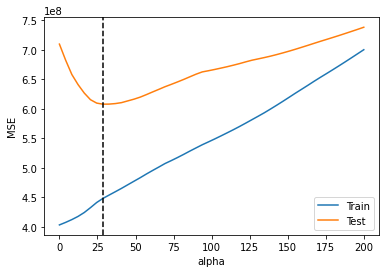

In [18]:
# Run this cell without changes
import matplotlib.pyplot as plt
%matplotlib inline

train_mse = []
test_mse = []
alphas = np.linspace(0, 200, num=50)

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_preprocessed, y_train)
    
    train_preds = lasso.predict(X_train_preprocessed)
    train_mse.append(mean_squared_error(y_train, train_preds))
    
    test_preds = lasso.predict(X_test_preprocessed)
    test_mse.append(mean_squared_error(y_test, test_preds))

fig, ax = plt.subplots()
ax.plot(alphas, train_mse, label='Train')
ax.plot(alphas, test_mse, label='Test')
ax.set_xlabel('alpha')
ax.set_ylabel('MSE')

# np.argmin() returns the index of the minimum value in a list
optimal_alpha = alphas[np.argmin(test_mse)]

# Add a vertical line where the test MSE is minimized
ax.axvline(optimal_alpha, color='black', linestyle='--')
ax.legend();

print(f'Optimal Alpha Value: {int(optimal_alpha)}')

Take a look at this graph of our training and test MSE against `alpha`. Try to explain to yourself why the shapes of the training and test curves are this way. Make sure to think about what `alpha` represents and how it relates to overfitting vs underfitting.

---

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

For `alpha` values below 28, the model is overfitting. As `alpha` increases up to 28, the MSE for the training data increases and MSE for the test data decreases, indicating that we are reducing overfitting.

For `alpha` values above 28, the model is starting to underfit. You can tell because _both_ the train and the test MSE values are increasing.

</details>

## Summary

Well done! You now know how to build lasso and ridge regression models, use them for feature selection and find an optimal value for `alpha`. 